# Import, options

In [1]:
import numpy, seaborn, pandas
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [4]:
%%time
#data mouse_NPC
df = pandas.read_csv(file_directory+'1) input/hNPC_H3K36me3_AllPeaks_SEACR.csv',
                               sep = ',')
print(df.shape)
df.head()

(42879, 23)
CPU times: total: 78.1 ms
Wall time: 236 ms


,seqnames,start,end,width,strand,Conc,Conc_32,Conc_37,Fold,p.value,...,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
0,chr16,29445753,29446153,401,*,6.833861,0.0,7.833861,-17.182478,1.322149e-11,...,29425800,29447026,21227,2,100422558,ENST00000532337.1,873,ENSG00000254634,SMG1P6,SMG1 pseudogene 6
1,chr1,144453062,144453462,401,*,6.751868,0.0,7.751868,-16.860628,5.894429e-11,...,144423930,144459380,35451,2,284565,ENST00000584793.7,5918,ENSG00000266338,NBPF15,NBPF member 15
2,chr4,103139323,103139723,401,*,8.130049,0.0,9.130049,-10.689641,1.304364e-10,...,103145303,103145781,479,2,1062,ENST00000515478.1,6058,ENSG00000138778,CENPE,centromere protein E
3,chr8,58629710,58630110,401,*,7.955882,0.0,8.955882,-10.539568,2.025052e-10,...,58601168,58623419,22252,2,8439,ENST00000519858.1,-6291,ENSG00000035681,NSMAF,neutral sphingomyelinase activation associated...
4,chr3,183717667,183718067,401,*,7.777551,0.0,8.777551,-10.345687,7.394206e-10,...,183697797,183812624,114828,1,55689,ENST00000305135.10,19870,ENSG00000163872,YEATS2,YEATS domain containing 2


In [5]:
df.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'Conc', 'Conc_32',
       'Conc_37', 'Fold', 'p.value', 'FDR', 'annotation', 'geneChr',
       'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME'],
      dtype='object')

In [6]:
columns = ['Conc', 'Conc_32','Conc_37', 'Fold', 
'p.value', 'FDR', 'annotation', 'geneChr', 'geneStart', 'geneEnd', 'geneLength', 
'geneStrand', 'geneId', 'distanceToTSS', 'SYMBOL', 'GENENAME']

df = df[columns]
df.head()

,Conc,Conc_32,Conc_37,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS,SYMBOL,GENENAME
0,6.833861,0.0,7.833861,-17.182478,1.322149e-11,5.679423e-07,Promoter (<=1kb),16,29425800,29447026,21227,2,100422558,873,SMG1P6,SMG1 pseudogene 6
1,6.751868,0.0,7.751868,-16.860628,5.894429e-11,1.266005e-06,"Intron (ENST00000488031.6/284565, intron 2 of 19)",1,144423930,144459380,35451,2,284565,5918,NBPF15,NBPF member 15
2,8.130049,0.0,9.130049,-10.689641,1.304364e-10,1.867676e-06,"Intron (ENST00000380026.8/1062, intron 36 of 46)",4,103145303,103145781,479,2,1062,6058,CENPE,centromere protein E
3,7.955882,0.0,8.955882,-10.539568,2.025052e-10,2.174703e-06,"Intron (ENST00000038176.8/8439, intron 6 of 30)",8,58601168,58623419,22252,2,8439,-6291,NSMAF,neutral sphingomyelinase activation associated...
4,7.777551,0.0,8.777551,-10.345687,7.394206e-10,5.441575e-06,"Exon (ENST00000305135.10/55689, exon 3 of 31)",3,183697797,183812624,114828,1,55689,19870,YEATS2,YEATS domain containing 2


In [7]:
#p.value is probably not adj.p.value

# VolcanoPlot

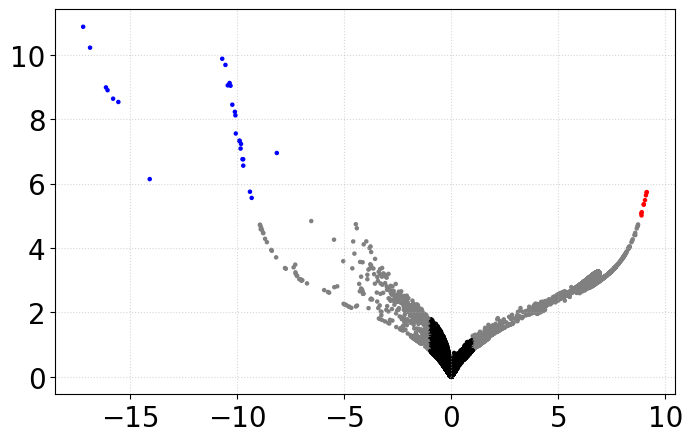

In [8]:
#volcano plot
colors = ['blue' if x < 1 and -numpy.log10(y) > 5 
          else 'red' if x > 1 and -numpy.log10(y) > 5
          else 'black' if x > -1 and x < 1
          else 'grey' for x, y in zip(df['Fold'], df['p.value'])]

# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df['Fold'],y=df['p.value'].apply(lambda x:-numpy.log10(x)),s=5,  c=colors) 

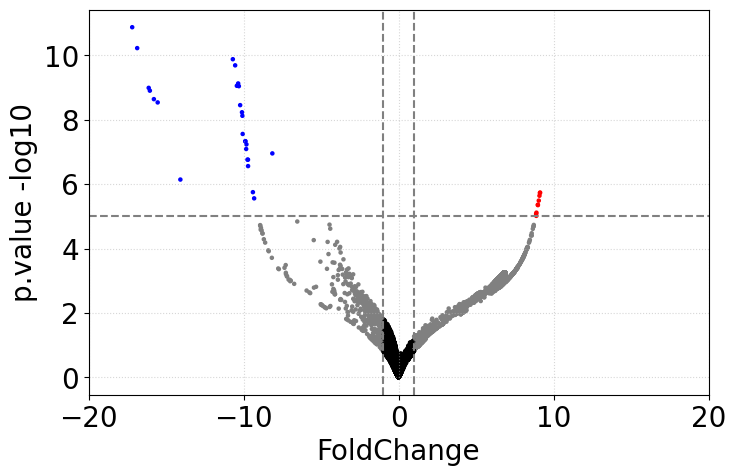

In [9]:
#volcano plot
colors = ['blue' if x < 1 and -numpy.log10(y) > 5 
          else 'red' if x > 1 and -numpy.log10(y) > 5
          else 'black' if x > -1 and x < 1
          else 'grey' for x, y in zip(df['Fold'], df['p.value'])]

# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df['Fold'],y=df['p.value'].apply(lambda x:-numpy.log10(x)),s=5,  c=colors) 
plt.xlim(-20, 20)
plt.xlabel("FoldChange")
plt.ylabel("p.value -log10")

plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(5,color="grey",linestyle="--")

title_file = 'volcano_NPC_H3K36me3'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

## Heatmap

In [10]:
df.shape

(42879, 16)

In [11]:
#select the interesting genes

df_hm = df[ (df['Fold'] > 1) | (df['Fold'] < -1) ]
df_hm = df_hm[ (df_hm['p.value'] < 10e-6) ]

print(df_hm.shape)

max_pval = df_hm['p.value'].max()
print(f'highest pvalue is {max_pval}')

df_hm = df_hm[['SYMBOL', 'Fold','p.value']]
df_hm.head()

(35, 16)
highest pvalue is 9.65779871320066e-06


,SYMBOL,Fold,p.value
0,SMG1P6,-17.182478,1.322149e-11
1,NBPF15,-16.860628,5.894429e-11
2,CENPE,-10.689641,1.304364e-10
3,NSMAF,-10.539568,2.025052e-10
4,YEATS2,-10.345687,7.394206e-10


In [12]:
# # convert FC to Log10(FC)
# ## Nan for negative, so I use for absolute 
# df_hm['log10(FC)'] = numpy.log10(numpy.abs(df_hm['Fold']))

# # Reintroduce the sign for negative values
# df_hm.loc[df_hm['Fold'] < 0, 'log10(FC)'] *= -1

In [13]:
print(df_hm['Fold'].min(), df_hm['Fold'].max())

-17.1824781488926 9.13261956579626


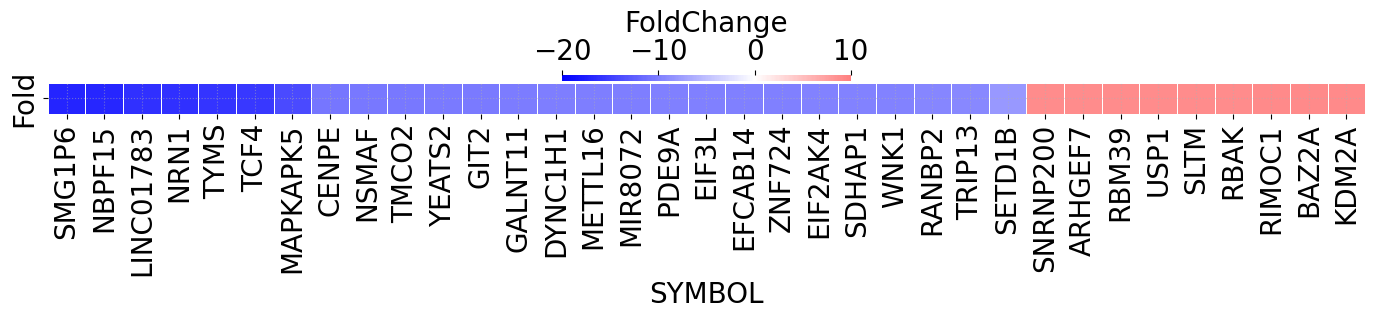

In [25]:
data = df_hm[['SYMBOL','Fold']]
data = data.sort_values(['Fold'], ascending = True)
data
data.set_index('SYMBOL', inplace= True)

plt.subplots(figsize=(17,0.5))
seaborn.heatmap(data.T, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-20, vmax=10,
               cbar_kws={'label': 'FoldChange', 'location' : 'top', 'orientation': 'horizontal',
                        'aspect': 50})

title_file = 'Heatmap_NPC_H3K36me3'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')